### Libraries

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import torch

TypeError: '_Environ' object is not callable

In [7]:
# Set the tensor shape
B, C, H, W = 2, 80, 256, 256

# Create a tensor with random geometric figures
tensor = torch.zeros((B, C, H, W))

# Define a list of geometric figures to draw
figures = ['circle', 'square', 'triangle']

# Loop through each batch and channel
for b in range(B):
    for c in range(C):
        # Randomly select a geometric figure
        figure = np.random.choice(figures)

        # Draw the geometric figure
        if figure == 'circle':
            radius = np.random.randint(20, 70)
            x, y = np.random.randint(0, H - radius), np.random.randint(0, W - radius)
            for i in range(x, x + radius):
                for j in range(y, y + radius):
                    if (i - x) ** 2 + (j - y) ** 2 <= radius ** 2:
                        tensor[b, c, i, j] = 1
        elif figure == 'square':
            size = np.random.randint(20, 70)
            x, y = np.random.randint(0, H - size), np.random.randint(0, W - size)
            tensor[b, c, x:x + size, y:y + size] = 1
        elif figure == 'triangle':
            size = np.random.randint(20, 70)
            x, y = np.random.randint(0, H - size), np.random.randint(0, W - size)
            for i in range(x, x + size):
                for j in range(y, y + size):
                    if i - x <= j - y:
                        tensor[b, c, i, j] = 1

# Print the tensor shape
print(tensor.shape)

torch.Size([2, 80, 256, 256])


torch.Size([2, 80, 256, 256])


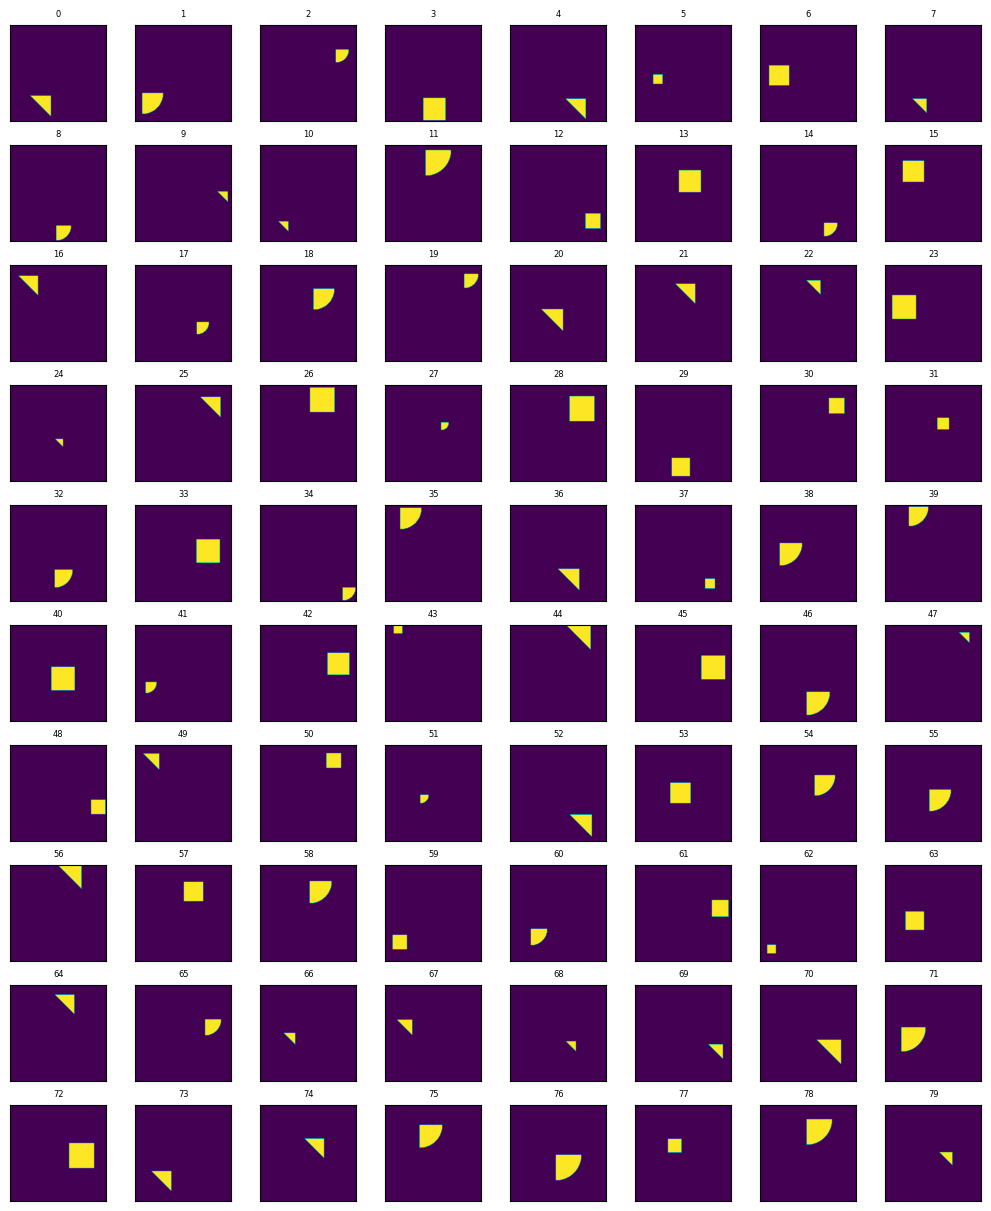

In [24]:
fig, axs = plt.subplots(10, 8, figsize=(10, 12), constrained_layout=True)
for i in range(10):
    for j in range(8):
        idx = i * 8 + j
        axs[i, j].imshow(tensor[0, idx].numpy())
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].set_title(str(idx), fontsize=6)  # reduce title font size
plt.savefig('/home/tiagociiic/Projects/InpainTor/outputs/debug/seg_channels.png', dpi=300)
plt.show()